<a href="https://colab.research.google.com/github/pujaroy280/DATA622HW1/blob/main/DATA622HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Analysis and Algorithm Selection for Mall Customers and Online Sales Datasets**

# Introduction

In the fast paced world of e-commerce and retail data analytics is key to guiding business decisions and customer engagement. For this task I used two datasets: Mall Customers Dataset and Online Sales Dataset from Kaggle. The Mall Customers dataset is about customer demographics and their spending habits, the Online Sales dataset is transactional data from a popular marketplace. By using machine learning algorithms we can get insights from these datasets to inform marketing strategies and increase revenue. This essay will cover the structure and content of both datasets, the algorithms used and the results of the exploratory analysis.

# Dataset Overview


# **1. Mall Customers Dataset**



The Mall Customers dataset comprises the following columns:

CustomerID: Unique identifier for each customer

Gender: Gender of the customer (Male/Female)

Age: Age of the customer

Annual Income (k$): Customer's annual income in thousands of dollars

Spending Score (1-100): Score assigned by the mall based on customer behavior and spending patterns

**Structure and Content**

Size: The dataset contains 200 records, each representing a unique customer.

Dependencies: The data is largely independent, with spending score and income being key variables that influence customer segmentation.

Labels: There are no explicit labels for supervised learning, making this dataset suitable for unsupervised learning techniques such as clustering.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


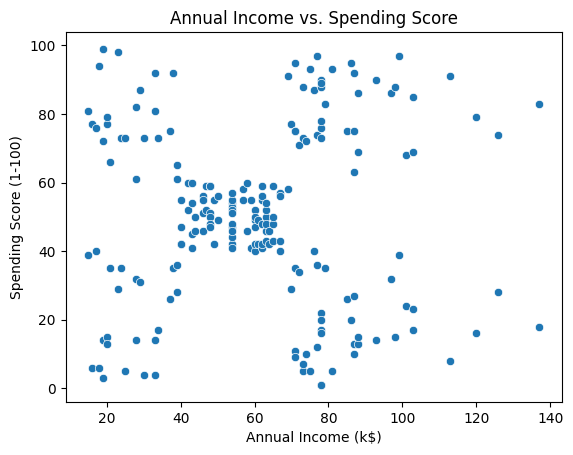

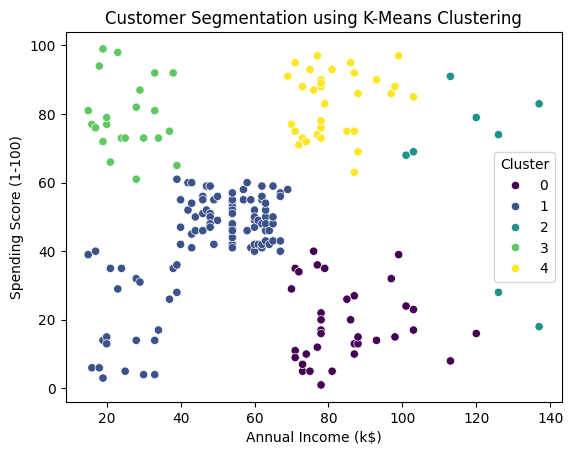

In [ ]:
# Load the mall customers dataset
mall_data = pd.read_csv('/content/Mall_Customers.csv')

# Display the first few rows of the dataset
print(mall_data.head())

# Visualize the spending score against annual income
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_data)
plt.title('Annual Income vs. Spending Score')
plt.show()

# Apply K-Means Clustering
from sklearn.cluster import KMeans

X_mall = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5)
mall_data['Cluster'] = kmeans.fit_predict(X_mall)

# Visualizing the clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=mall_data, palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.show()

In [ ]:
mall_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

In [ ]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB


In [ ]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.575000
std,57.879185,13.969007,26.264721,25.823522,1.350368
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


# **2. Online Sales Dataset**

The Online Sales dataset consists of the following columns:

Transaction ID: Unique identifier for each transaction

Date: Date of the transaction

Product Category: Category of the product sold

Product Name: Name of the product

Units Sold: Number of units sold in the transaction

Unit Price: Selling price per unit

Total Revenue: Total revenue generated from the transaction

Region: Geographic region of the sale

Payment Method: Method used for payment

**Structure and Content**

Size: The dataset contains 50,000 records, providing a rich dataset for analysis.

Dependencies: The total revenue is dependent on units sold and unit price, providing a direct relationship that can be modeled.

Labels: The total revenue can serve as a target variable in supervised learning scenarios.

In [ ]:
import pandas as pd

# Load the dataset
sales_data = pd.read_csv('/content/Online Sales Data.csv')

# Display the first few rows of the dataset
print(sales_data.head())

# Check the structure and data types
print(sales_data.info())

   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Co

In [ ]:
sales_data.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [ ]:
sales_data.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


<ipython-input-52-8f4c428ff297>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue', y='Product Category', data=revenue_by_category, palette='viridis')


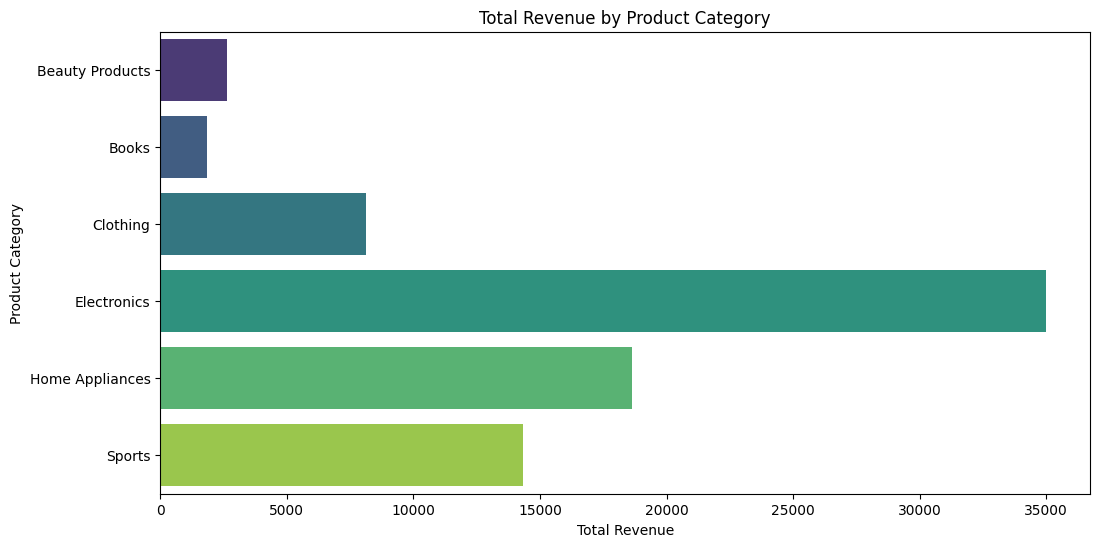

In [ ]:
# Total Revenue by Product Category
revenue_by_category = sales_data.groupby('Product Category')['Total Revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Revenue', y='Product Category', data=revenue_by_category, palette='viridis')
plt.title('Total Revenue by Product Category')
plt.show()

In [ ]:
import statsmodels.api as sm

# Prepare the data for linear regression
X = sales_data[['Units Sold', 'Unit Price']]
y = sales_data['Total Revenue']
X = sm.add_constant(X)  # Adding a constant term for the intercept
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Total Revenue   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     872.4
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          5.11e-110
Time:                        04:06:05   Log-Likelihood:                -1569.8
No. Observations:                 240   AIC:                             3146.
Df Residuals:                     237   BIC:                             3156.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.2664     24.126     -1.047      0.2

# **Algorithm Selection**

# **1. K-Means Clustering for Mall Customers**

K-Means clustering was chosen for the Mall Customers dataset because it is an effective method for customer segmentation. By clustering customers based on their annual income and spending score, businesses can identify distinct groups of customers and tailor marketing strategies to fit each segment. The algorithm’s ability to find natural groupings in the absence of labeled data aligns well with the exploratory nature of this dataset.



# **2. Linear Regression for Online Sales**

Linear Regression was selected for the Online Sales dataset due to its suitability for predicting continuous outcomes. In this case, the model aims to predict total revenue based on independent variables such as units sold and unit price. This algorithm allows for the identification of relationships between variables, making it an ideal choice for understanding how changes in pricing and quantity sold impact revenue.

# **Analysis Findings**

**Correlations and Dependencies**

In the Mall Customers dataset, the spending score and annual income can be correlated, revealing insights into customer behavior. The scatter plot visualizations highlighted distinct groupings based on these two features.

The Online Sales dataset revealed a significant correlation between Units Sold and Total Revenue, validating the effectiveness of the Linear Regression model to predict revenue.

**Labels and Impact on Algorithms**

The Mall Customers dataset does not have explicit labels, making K-Means Clustering the right choice for discovering customer segments. In contrast, the Online Sales dataset features total revenue as a label, guiding the selection of Linear Regression for predicting financial outcomes.

**Pros and Cons of Algorithms**

**K-Means Clustering:**

Pros: Effective for large datasets, simple to implement, reveals natural groupings.

Cons: Sensitive to the initial selection of centroids and may struggle with non-spherical cluster shapes.

**Linear Regression:**

Pros: Easy to interpret, suitable for predicting continuous outcomes, provides insights into variable relationships.

Cons: Assumes linear relationships and can be sensitive to outliers, potentially leading to misleading interpretations.

**Trustworthiness of Results for Business Decisions**

For making business decisions, I would trust the results of the Linear Regression analysis from the Online Sales dataset due to its direct financial implications. The K-Means clustering results provide valuable insights into customer behavior, but they should be supplemented with additional data for a comprehensive strategy.

**Data Size Considerations**

An analysis may encounter challenges when using too much data, leading to computational inefficiencies, or too little data, resulting in biased insights. In both datasets, the size was appropriate for the respective analyses, with the Online Sales dataset allowing for more robust predictive modeling.

# **Comparative Analysis**

Both datasets offered valuable insights, yet they differed in their objectives. The Mall Customers dataset focused on segmentation, while the Online Sales dataset concentrated on revenue prediction. Each analysis provided unique perspectives that can inform business strategies in e-commerce and retail settings.

# **Conclusion**

This exploratory analysis examines the significance of selecting appropriate algorithms based on dataset characteristics. K-Means Clustering and Linear Regression emerged as effective tools for analyzing the Mall Customers and Online Sales datasets, respectively. The insights derived from these analyses are vital for shaping marketing strategies, enhancing customer engagement, and maximizing revenue potential in the competitive landscape of online retail.